# Technical assesment Juan José Muñoz Correa

## Importing, reading and preparation of the data

In [1]:
import os
os.environ["PATH"] += os.pathsep + 'D:/Graphviz/bin'
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn import tree
import graphviz
import matplotlib.pyplot as plt 

In [2]:
bd = pd.read_excel("DB/Base de datos prueba tecnica.xlsx",sheet_name = 1)

In [3]:
bd.columns

Index(['REGIONAL', 'DEPARTAMENTO', 'TECNOL', 'GERENCIA',
       'CANAL_HOMOLOGADO_MILLICON', 'tipo_fuerza_venta', 'estrato',
       'antiguedad_meses', 'productos', 'portafolio', 'no_serv_tecnicos',
       'fallo', 'asesoria_factura', 'pedidos_peticiones', 'reagendamiento',
       'asesoria_servicios', 'retencion', 'Otras', 'quejas_fraude', 'traslado',
       'Incumplimiento_pago', 'cliente_id'],
      dtype='object')

In [4]:
bd['w'] = [0.58 if x == 0 else 3.49 for x in bd['Incumplimiento_pago']]
bd['no_serv_tecnicos'] = [1 if x == 1.0 else 0 for x in bd['no_serv_tecnicos']]

In [5]:
bd['antiguedad_meses'] = [0 if np.isnan(x) else x for x in bd['antiguedad_meses']]

In [6]:
obj = ['Incumplimiento_pago']
var_bin = ['asesoria_servicios', 'retencion', 'quejas_fraude', 'traslado', 'no_serv_tecnicos']
var_int = ['antiguedad_meses']
var_str = ['tipo_fuerza_venta', 'estrato','productos', 'portafolio']

In [7]:
bd[var_str] = bd[var_str].astype(str)

## Decision tree for variable selection

In [8]:
ohe = sk.preprocessing.OneHotEncoder(sparse = False)
clf = tree.DecisionTreeClassifier(max_depth = 5, criterion = 'entropy')

In [9]:
df_list = []
vars_str_nuevas = []
for var in var_str:
    y = pd.get_dummies(bd[var], prefix=var)
    df_list.append(y)
    for i in y.columns:
        vars_str_nuevas.append(i)
df_ohe = pd.concat(df_list,axis = 1)
print(vars_str_nuevas)
df_ohe.head()

['tipo_fuerza_venta_DIRECTA', 'tipo_fuerza_venta_INDIRECTA', 'estrato_1', 'estrato_2', 'estrato_3', 'estrato_4', 'estrato_5', 'estrato_6', 'estrato_SE', 'productos_BA', 'productos_TO', 'productos_TO+BA', 'productos_TO+TV', 'productos_TO+TV+BA', 'productos_TV', 'productos_TV+BA', 'portafolio_Duo', 'portafolio_Individual', 'portafolio_Trio']


,tipo_fuerza_venta_DIRECTA,tipo_fuerza_venta_INDIRECTA,estrato_1,estrato_2,estrato_3,estrato_4,estrato_5,estrato_6,estrato_SE,productos_BA,productos_TO,productos_TO+BA,productos_TO+TV,productos_TO+TV+BA,productos_TV,productos_TV+BA,portafolio_Duo,portafolio_Individual,portafolio_Trio
0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0
2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [10]:
X = pd.concat([df_ohe,bd[var_int],bd[var_bin]],axis = 1)
X.head()

,tipo_fuerza_venta_DIRECTA,tipo_fuerza_venta_INDIRECTA,estrato_1,estrato_2,estrato_3,estrato_4,estrato_5,estrato_6,estrato_SE,productos_BA,...,productos_TV+BA,portafolio_Duo,portafolio_Individual,portafolio_Trio,antiguedad_meses,asesoria_servicios,retencion,quejas_fraude,traslado,no_serv_tecnicos
0,0,1,0,0,1,0,0,0,0,0,...,1,1,0,0,19.0,0,0,0,0,1
1,0,1,0,0,1,0,0,0,0,0,...,1,1,0,0,19.0,0,0,0,0,1
2,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,1.0,0,0,0,0,1
3,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,7.0,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,7.0,0,0,0,0,0


In [11]:
clf = clf.fit(X, bd[obj], sample_weight = bd['w'])

In [12]:
vn = [*vars_str_nuevas,*var_int,*var_bin]

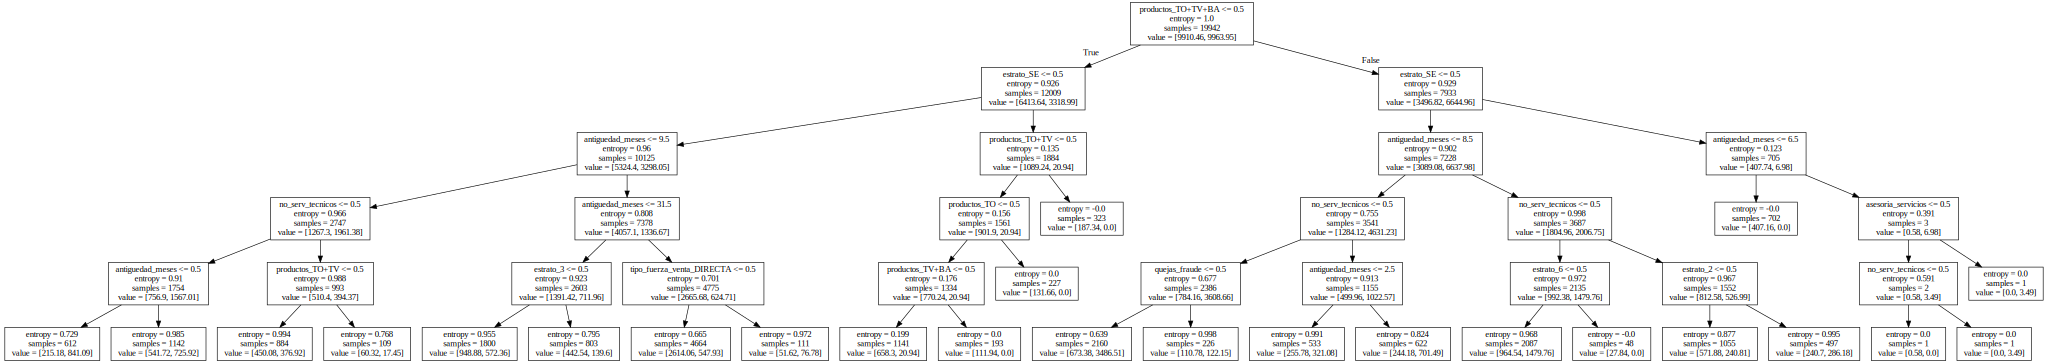

In [13]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names = vn)
graph = graphviz.Source(dot_data)
graph

## Logistic regression model

In [14]:
X['antiguedad_meses'] = X['antiguedad_meses'] / 337

In [15]:
lreg = sk.linear_model.LogisticRegression(random_state = 2002).fit(X, bd[obj], sample_weight = bd['w'])

c:\users\juanj\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Weighted confusion matrix


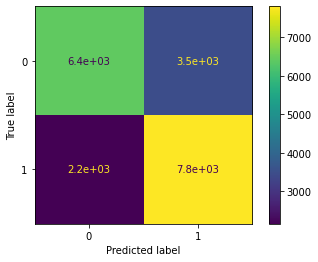

In [16]:
print('Weighted confusion matrix')
sk.metrics.plot_confusion_matrix(lreg, X, bd[obj], sample_weight = bd['w'])
plt.show()

Weightless confusion matrix


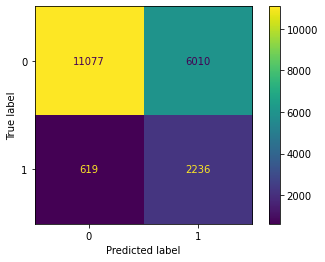

In [17]:
print('Weightless confusion matrix')
sk.metrics.plot_confusion_matrix(lreg, X, bd[obj])
plt.show()

In [18]:
print('Classifier recall: ', sk.metrics.recall_score(bd[obj], lreg.predict(X)))

Classifier recall:  0.7831873905429072


In [19]:
print('Classifier accuracy: ', sk.metrics.accuracy_score(bd[obj], lreg.predict(X)))

Classifier accuracy:  0.6675859993982549


Weightless ROC curve


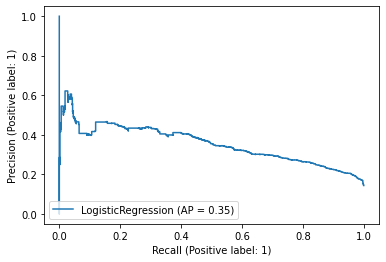

In [20]:
print('Weightless ROC curve')
sk.metrics.plot_precision_recall_curve(lreg, X, bd[obj])
plt.show()

### Client's risk probability

In [21]:
bd['r_prob'] = lreg.predict_proba(X)[:,1]

In [22]:
with pd.ExcelWriter('DB/Base de datos prueba tecnica.xlsx', mode = 'a') as writer:
    bd.to_excel(writer, sheet_name = 'DB with prob')

### Weight analysis - risky profiles

In [23]:
for i, j in sorted(zip(vn,*lreg.coef_), key=lambda x: abs(x[1]), reverse = True):
    print(i,' : ',j)

estrato_SE  :  -3.63526988154027
antiguedad_meses  :  -3.317311794303171
estrato_1  :  1.0482446098528764
estrato_2  :  1.0292856777902808
estrato_4  :  0.8800419631489887
no_serv_tecnicos  :  -0.7440969558020727
estrato_3  :  0.7401493343630878
quejas_fraude  :  -0.55633735811807
tipo_fuerza_venta_INDIRECTA  :  -0.4554429678535366
tipo_fuerza_venta_DIRECTA  :  0.4311948906988568
productos_TO+TV+BA  :  0.40883742268977685
portafolio_Trio  :  0.40883742268977685
portafolio_Individual  :  -0.31683667612210376
asesoria_servicios  :  -0.25760886942084127
productos_TO+TV  :  -0.25311090532469926
productos_TV  :  -0.18441802903762985
estrato_6  :  -0.18066561013863985
productos_TO+BA  :  0.1730612399978174
portafolio_Duo  :  -0.11624882372236091
productos_TO  :  -0.10934378895976626
estrato_5  :  0.09396582936899806
traslado  :  -0.0918034463055937
productos_TV+BA  :  -0.03619915839548095
retencion  :  -0.035746403604106594
productos_BA  :  -0.0230748581247018
